# Tipos de datos en estadistica Diferencial

Existen dos tipos de datos en estadistica:

1. __*Datos categoricos*__: Son aquellos datos que como su nombre lo indica representan ciertas agrupaciones de datos bajo la misma etiqueta.

* __*Ordinales*__: Es decir aquellos que de alguna manera se pueden organizar debido a alguna logica.
* __*Nominales*__: por el contrario son aquellos que no pueden ser organizados.

2. __*Datos numericos*__: Corresponden a aquellos datos que son de tipo numerico.
- __*Discretos*__: Corresponden a aquellos que solo representan un valor especifico.
- __*Continuos*__: eston son aquellos que se encuentran a lo largo del espectro de los numeros reales.

Para realizar el desarrollo de este ejercio se va a trabajar con el archivo cars.csv.

Por lo tanto se procede a realizar la importación del archivo así:

In [38]:
import pandas as pd 
df = pd.read_csv('notas/cars.csv')
df.head(5)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


## Tipologias:
Para poder identificar los tipos de datos de cada una de las columnas del dataframe se utiliza:

In [6]:
df.dtypes.head(5)

manufacturer_name    object
model_name           object
transmission         object
color                object
odometer_value        int64
dtype: object

Sin embargo con este tipo de metodos se genera el tipo de dato objeto, por lo tanto lo más recomendable es convertir los datos de la siguiente manera:

In [8]:
df.convert_dtypes().dtypes.head(10)

manufacturer_name     string
model_name            string
transmission          string
color                 string
odometer_value         Int64
year_produced          Int64
engine_fuel           string
engine_has_gas       boolean
engine_type           string
engine_capacity      Float64
dtype: object

Aquí vemos que los tipos de datos se identifican de la siguiente manera: 

* Categoricos: `string`, `boolean`
* Numéricos: `Int64` (discreto y acepta NAN), `Float64` (contínuo y acepta NAN)

## Estadisticos Descriptivos:

Corresponden al conjunto de calculos que permiten identificar las caracteriticas de un cojunto de datos.

Entre los estadisticos más comunes se encuentran:

- Media: se ejecuta como `.mean()`

Media = $$ \frac{1}{N} \sum_{i=1}^N x_i  $$

- Mediana: se ejecuta como `.median()`

Mediana(impar) = $$ x_{(n+1)/2}^{\text{ordered}} $$

Mediana(par) = $$ \frac{x_{n/2}^{\text{ordered}} + x_{n/2+1}^{\text{ordered}}}{2} $$

- Moda:se ejecuta como `.mode()`

Moda = $$ x_k $$ donde $$ \text{Freq}(x_k) = \max{(\text{Freq}(x_i))} $$ 

In [16]:
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


o de forma individual para cada columna de la siguiente manera:

In [10]:
df['price_usd'].mean()

6639.971021255604

In [12]:
df['price_usd'].median()

4800.0

In [11]:
df['price_usd'].mode()

0    1500.0
dtype: float64

Tambien se puede realiza el histograma para el analisis grafico de la información.

Esto se puede realizar con diferentes librerias tales como seaborn, pandas, etc.

<AxesSubplot:ylabel='Frequency'>

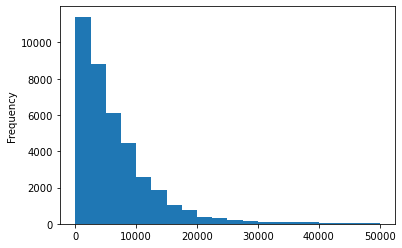

In [17]:
df['price_usd'].plot.hist(bins=20)

Este mismo análisis se puede realizar pero segmentando la información por marcas:

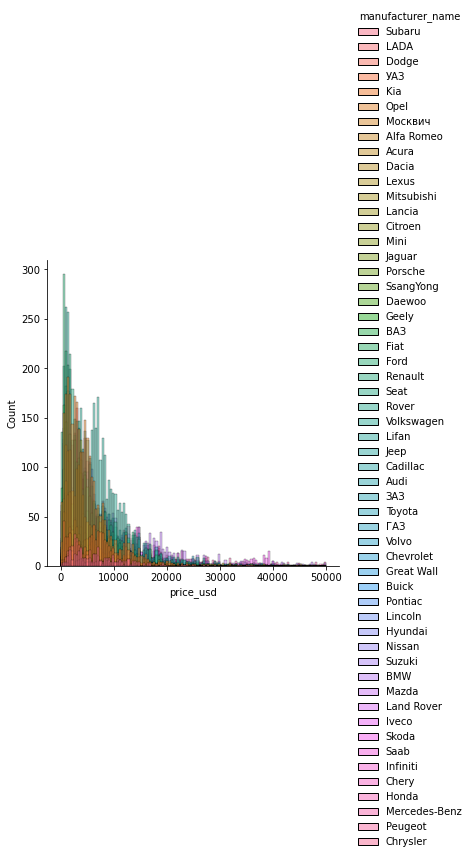

In [18]:
import seaborn as sns
sns.displot(df, x = 'price_usd', hue = 'manufacturer_name')

o por tipo de combustible:

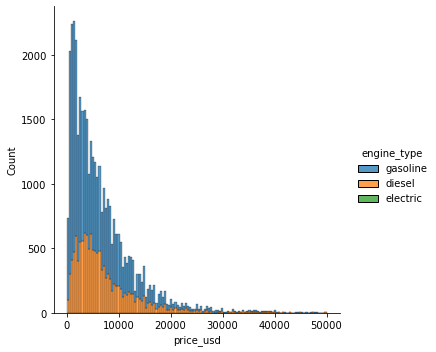

In [22]:
import seaborn as sns
sns.displot(df, x = 'price_usd', hue = 'engine_type', multiple='stack')

**RETO:** Inspeccionemos precios de una marca y modelo particular !

In [33]:
df[df['manufacturer_name']=='Hyundai'].head(5)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
24789,Hyundai,Sonata,mechanical,grey,229000,2008,gasoline,False,gasoline,2.0,...,True,True,False,False,True,False,False,False,True,45
24790,Hyundai,Sonata,automatic,blue,105000,2015,gasoline,False,gasoline,2.4,...,True,True,False,True,True,True,True,True,True,32
24791,Hyundai,Santa Fe,automatic,white,142588,2010,gasoline,False,gasoline,2.4,...,True,False,False,False,True,False,True,True,True,33
24792,Hyundai,Galloper,mechanical,blue,300000,1993,diesel,False,diesel,2.5,...,False,False,False,False,False,False,False,False,False,178
24793,Hyundai,Sonata,automatic,blue,300000,1997,gasoline,False,gasoline,2.9,...,True,False,False,True,True,False,False,False,True,2


<AxesSubplot:xlabel='price_usd', ylabel='Count'>

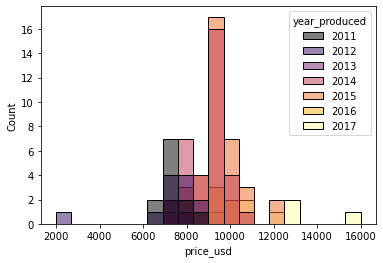

In [31]:
Solaris_df = df[(df['manufacturer_name']=='Hyundai') & (df['model_name']=='Solaris')]
sns.histplot(Solaris_df, x='price_usd', hue = 'year_produced', palette='inferno')

In [34]:
Solaris_df.head(5)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
24801,Hyundai,Solaris,mechanical,grey,66115,2016,gasoline,False,gasoline,1.6,...,False,False,True,False,True,False,False,False,False,59
24808,Hyundai,Solaris,automatic,brown,86900,2015,gasoline,False,gasoline,1.6,...,True,False,False,False,True,False,True,True,True,25
24820,Hyundai,Solaris,automatic,silver,160000,2013,gasoline,False,gasoline,1.6,...,True,False,False,False,False,False,False,True,False,91
24835,Hyundai,Solaris,mechanical,blue,171600,2014,gasoline,False,gasoline,1.6,...,True,False,True,False,True,False,False,False,False,32
24845,Hyundai,Solaris,automatic,black,121000,2014,gasoline,False,gasoline,1.4,...,True,False,True,False,True,False,False,False,False,127


## Estadisticos de tendencia central:

- Cuartiles / Percentiles: se ejecuta como `.quantile(q=x)` en donde x es el percentil que se desea obtener en el rango de 0 a 1
- Desviación estandar: se ejecuta como `.std()`

Estos estadisticos se pueden obtener deforma automatica mediante el metodo `.describe()` para todo el df.

In [13]:
df['price_usd'].quantile(q=0.25)

2100.0

In [14]:
df['price_usd'].std()

6428.152018202915

El manejo de cuartiles se puede observar graficamente gracias al `boxplot` o grafico de cajas y bigotes, en el cual la caja represente a los Q1, Q2 y Q3, y los bigotes los outliers

/home/odmorenoc/anaconda3/envs/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, '')]

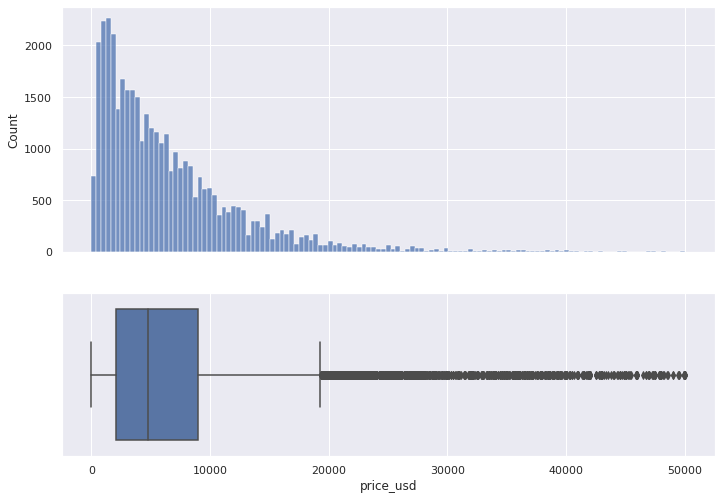

In [36]:
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(11.7,8.27)})
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.6, .4)})
sns.histplot(df['price_usd'], ax=ax_hist)
sns.boxplot(df['price_usd'], ax=ax_box)
ax_hist.set(xlabel='')

Tambien es posible realizar un `boxplot` con diferentes categorias:

<AxesSubplot:xlabel='engine_fuel', ylabel='price_usd'>

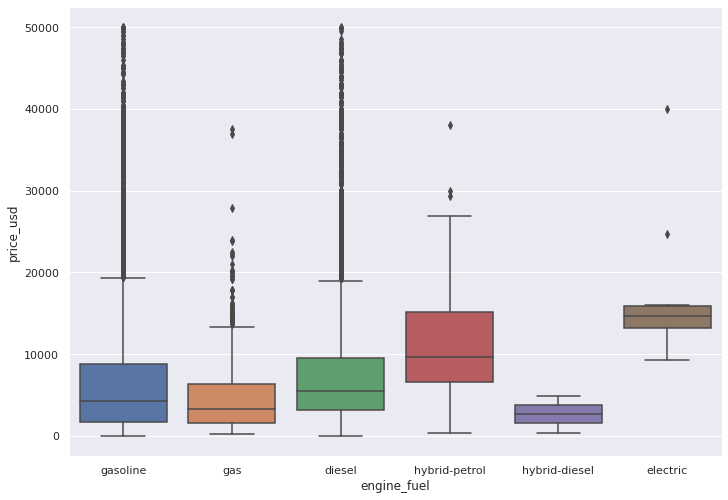

In [37]:
sns.boxplot(x = 'engine_fuel', y = 'price_usd', data = df)